In [ ]:
# import library yang dibutuhkan
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
data = pd.read_csv('/content/creditcardmarketing-bbm.csv')
data.head()

,Customer Number,Offer Accepted,Reward,Mailer Type,Income Level,# Bank Accounts Open,Overdraft Protection,Credit Rating,# Credit Cards Held,# Homes Owned,Household Size,Own Your Home,Average Balance,Q1 Balance,Q2 Balance,Q3 Balance,Q4 Balance
0,1,No,Air Miles,Letter,High,1,No,High,2,1,4,No,1160.75,1669.0,877.0,1095.0,1002.0
1,2,No,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes,147.25,39.0,106.0,78.0,366.0
2,3,No,Air Miles,Postcard,High,2,No,Medium,2,1,2,Yes,276.50,367.0,352.0,145.0,242.0
3,4,No,Air Miles,Letter,Medium,2,No,High,1,1,4,No,1219.00,1578.0,1760.0,1119.0,419.0
4,5,No,Air Miles,Letter,Medium,1,No,Medium,2,1,6,Yes,1211.00,2140.0,1357.0,982.0,365.0


In [ ]:
# cek nilai yang kosong
data.isnull().sum()

Customer Number          0
Offer Accepted           0
Reward                   0
Mailer Type              0
Income Level             0
# Bank Accounts Open     0
Overdraft Protection     0
Credit Rating            0
# Credit Cards Held      0
# Homes Owned            0
Household Size           0
Own Your Home            0
Average Balance         24
Q1 Balance              24
Q2 Balance              24
Q3 Balance              24
Q4 Balance              24
dtype: int64

In [ ]:
# karena nilai yang kosong merupakan nilai numerik, kita dapat mengganti nilai kosong tersebut menggunakan nilai mean
data['Average Balance'] = data['Average Balance'].fillna(data['Average Balance'].mean())
data['Q1 Balance'] = data['Q1 Balance'].fillna(data['Q1 Balance'].mean())
data['Q2 Balance'] = data['Q2 Balance'].fillna(data['Q2 Balance'].mean())
data['Q3 Balance'] = data['Q3 Balance'].fillna(data['Q3 Balance'].mean())
data['Q4 Balance'] = data['Q4 Balance'].fillna(data['Q4 Balance'].mean())

In [ ]:
# Data sudah bersih dari nilai yang kosong
data.isnull().sum()

Customer Number         0
Offer Accepted          0
Reward                  0
Mailer Type             0
Income Level            0
# Bank Accounts Open    0
Overdraft Protection    0
Credit Rating           0
# Credit Cards Held     0
# Homes Owned           0
Household Size          0
Own Your Home           0
Average Balance         0
Q1 Balance              0
Q2 Balance              0
Q3 Balance              0
Q4 Balance              0
dtype: int64

In [ ]:
# Terdapat sebanyak 17 kolom dengan 18000 baris data pada dataset yang akan digunakan.
data.shape

(18000, 17)

In [ ]:
# untuk mengetahui tipe data pada setiap kolom 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18000 entries, 0 to 17999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Customer Number       18000 non-null  int64  
 1   Offer Accepted        18000 non-null  object 
 2   Reward                18000 non-null  object 
 3   Mailer Type           18000 non-null  object 
 4   Income Level          18000 non-null  object 
 5   # Bank Accounts Open  18000 non-null  int64  
 6   Overdraft Protection  18000 non-null  object 
 7   Credit Rating         18000 non-null  object 
 8   # Credit Cards Held   18000 non-null  int64  
 9   # Homes Owned         18000 non-null  int64  
 10  Household Size        18000 non-null  int64  
 11  Own Your Home         18000 non-null  object 
 12  Average Balance       18000 non-null  float64
 13  Q1 Balance            18000 non-null  float64
 14  Q2 Balance            18000 non-null  float64
 15  Q3 Balance         

In [ ]:
data.rename(columns = {'# Bank Accounts Open' : 'Bank Accounts Open', 
    '# Credit Cards Held': 'Credit Cards Held', 
    '# Homes Owned': 'Homes Owned'}, inplace=True)



* Average Balence paling banyak berada di angka 1000
* Persebaran data Q2 Balence berada diantara niali 1000 hingga 1500
* Data Q1 Balance paling banyak berada di angka 200 hingga 900 diikuti dengan data dengan nilai rentang antara 1500 dan 2000

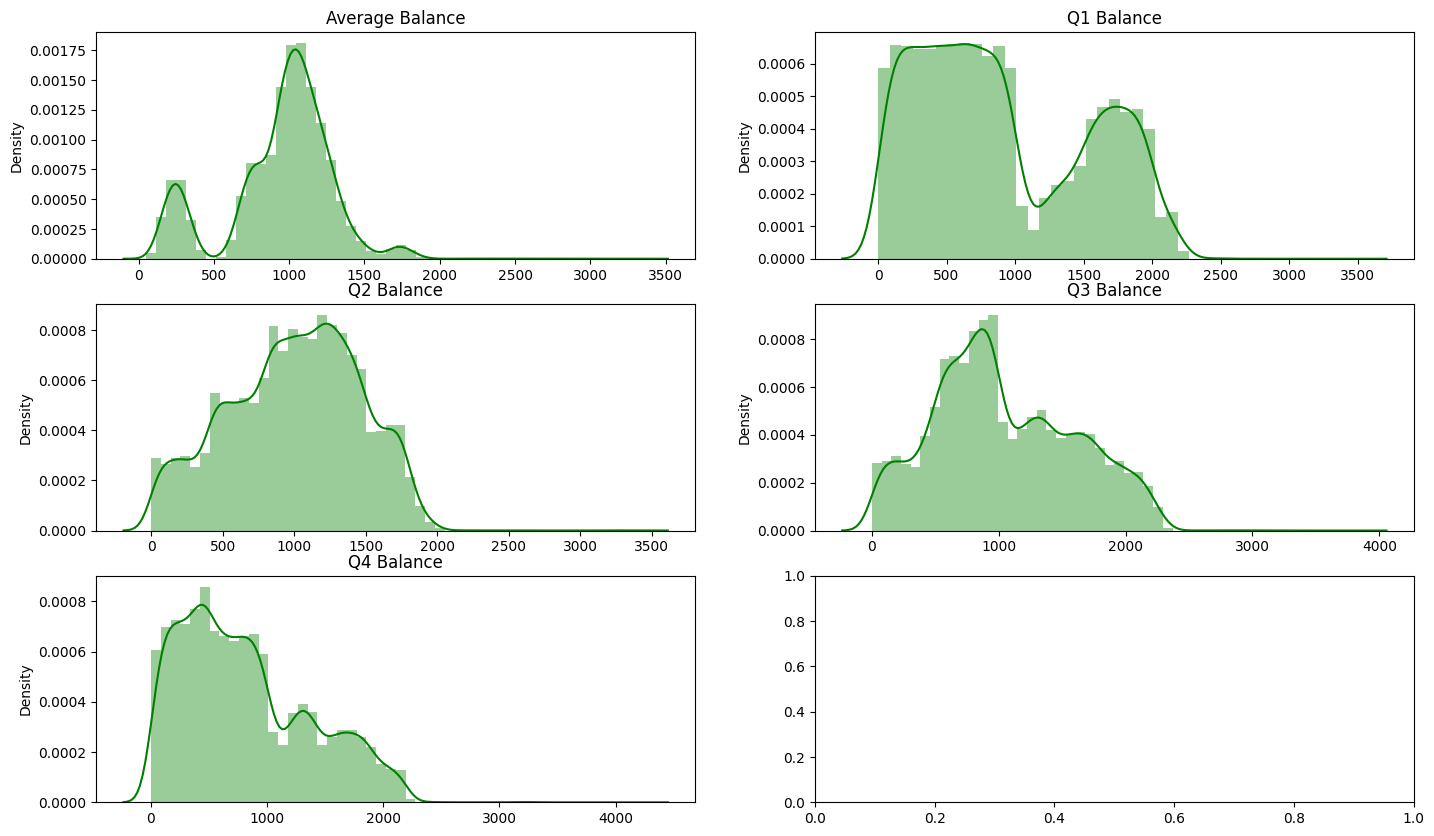

In [ ]:
f,ax = plt.subplots(3,2,figsize=(17,10))

g = sns.distplot(data['Average Balance'],color='green',ax=ax[0,0])
ax[0,0].set_title('Average Balance')
ax[0,0].set_xlabel('')

g = sns.distplot(data['Q1 Balance'],color='green', ax=ax[0,1])
ax[0,1].set_title('Q1 Balance')
ax[0,1].set_xlabel('')

g = sns.distplot(data['Q2 Balance'],color='green',ax=ax[1,0])
ax[1,0].set_title('Q2 Balance')
ax[1,0].set_xlabel('')

g = sns.distplot(data['Q3 Balance'],color='green', ax=ax[1,1])
ax[1,1].set_title('Q3 Balance')
ax[1,1].set_xlabel('')

g = sns.distplot(data['Q4 Balance'],color='green', ax=ax[2,0])
ax[2,0].set_title('Q4 Balance')
ax[2,0].set_xlabel('')
plt.show()

* Sebanyak 94.3% pengajuan credit nasabah ditolak

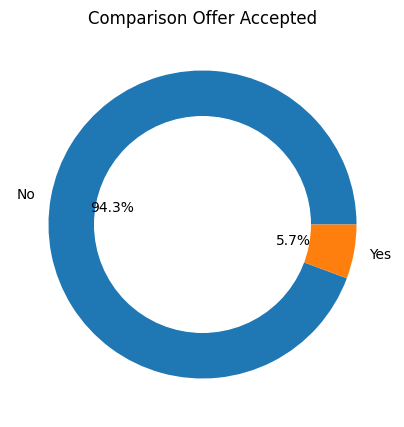

In [ ]:
plt.rcParams["figure.figsize"] = (5,5)
temp = data['Offer Accepted'].value_counts()
plt.pie(temp.values,
		labels=temp.index,
		autopct='%1.1f%%')
# add a circle at the center to transform it in a donut chart
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title("Comparison Offer Accepted")
plt.show()

<Figure size 2000x1000 with 0 Axes>

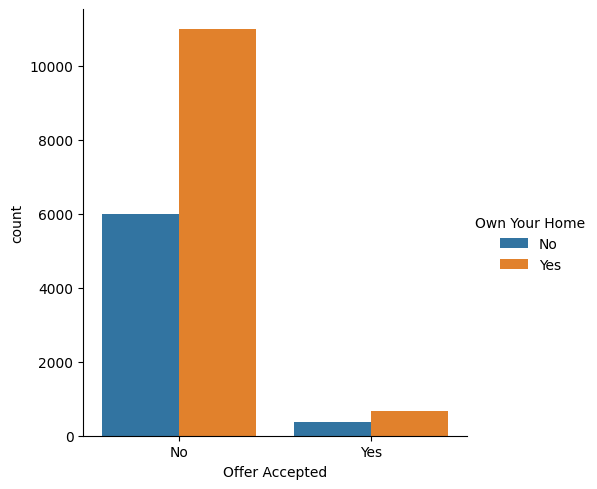

In [ ]:
plt.figure(figsize=(20,10))
sns.catplot(x='Offer Accepted', hue='Own Your Home',kind='count', data=data)
plt.show()

<Figure size 2000x1000 with 0 Axes>

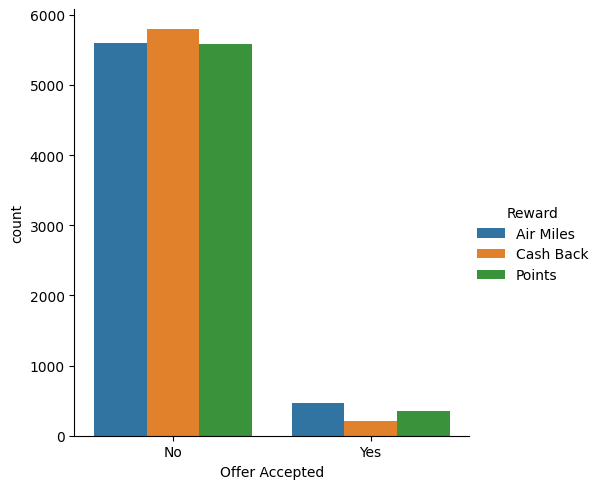

In [ ]:
plt.figure(figsize=(20,10))
sns.catplot(x='Offer Accepted', hue='Reward',kind='count', data=data)
plt.show()

<Figure size 2000x1000 with 0 Axes>

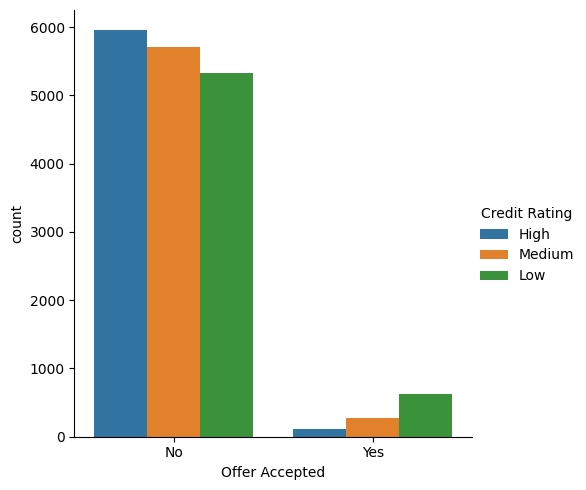

In [ ]:
plt.figure(figsize=(20,10))
sns.catplot(x='Offer Accepted', hue='Credit Rating',kind='count', data=data)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 2000x1000 with 0 Axes>

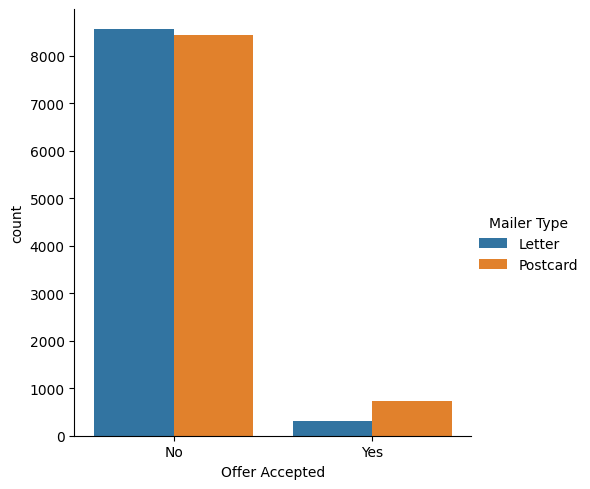

In [ ]:
plt.figure(figsize=(20,10))
sns.catplot(x='Offer Accepted', hue='Mailer Type',kind='count', data=data)
plt.show

<Figure size 2000x1000 with 0 Axes>

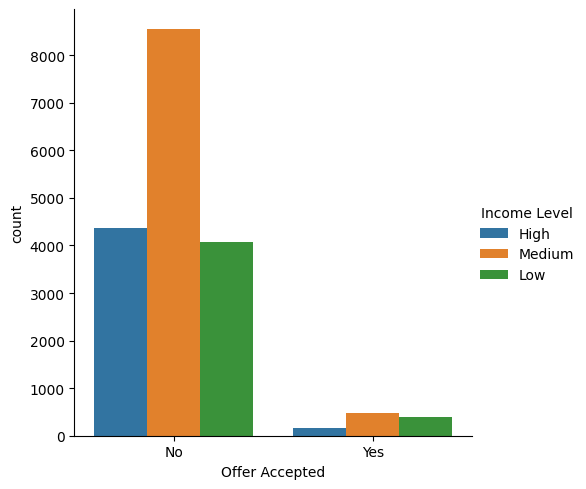

In [ ]:
plt.figure(figsize=(20,10))
sns.catplot(x='Offer Accepted', hue='Income Level',kind='count', data=data)
plt.show()

<Figure size 2000x1000 with 0 Axes>

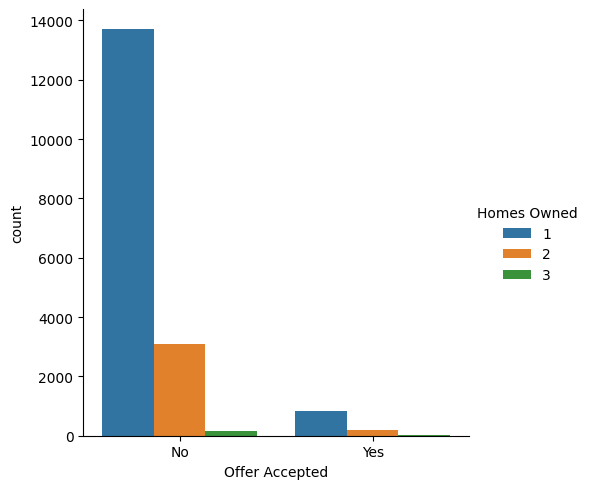

In [ ]:
plt.figure(figsize=(20,10))
sns.catplot(x='Offer Accepted', hue='Homes Owned',kind='count', data=data)
plt.show()

<Figure size 2000x1000 with 0 Axes>

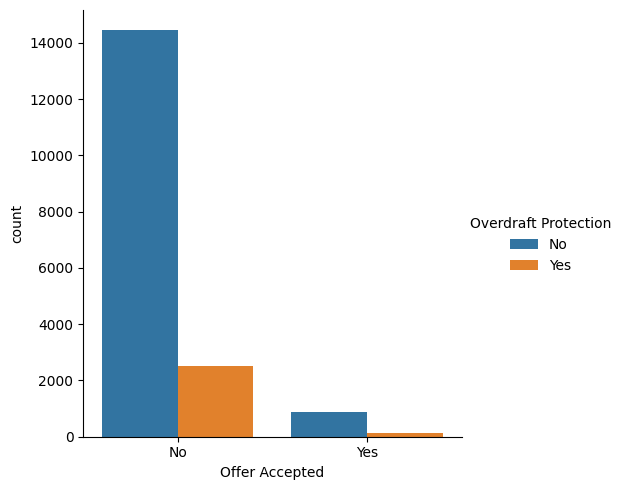

In [ ]:
plt.figure(figsize=(20,10))
sns.catplot(x='Offer Accepted', hue='Overdraft Protection',kind='count', data=data)
plt.show()

In [ ]:
data.head()

,Customer Number,Offer Accepted,Reward,Mailer Type,Income Level,Bank Accounts Open,Overdraft Protection,Credit Rating,Credit Cards Held,Homes Owned,Household Size,Own Your Home,Average Balance,Q1 Balance,Q2 Balance,Q3 Balance,Q4 Balance
0,1,No,Air Miles,Letter,High,1,No,High,2,1,4,No,1160.75,1669.0,877.0,1095.0,1002.0
1,2,No,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes,147.25,39.0,106.0,78.0,366.0
2,3,No,Air Miles,Postcard,High,2,No,Medium,2,1,2,Yes,276.50,367.0,352.0,145.0,242.0
3,4,No,Air Miles,Letter,Medium,2,No,High,1,1,4,No,1219.00,1578.0,1760.0,1119.0,419.0
4,5,No,Air Miles,Letter,Medium,1,No,Medium,2,1,6,Yes,1211.00,2140.0,1357.0,982.0,365.0


In [ ]:
# Data yang digunakan sangat tidak seimbang, sehingga tidak dapat dilakukan modeling langsung
# Untuk mengatasi ini, gunakan metode SMOTE
data['Offer Accepted'].value_counts()

No     16977
Yes     1023
Name: Offer Accepted, dtype: int64

Label Encoding

In [ ]:
# melakukan pelabelan encoding pada categorical data sehingga data dapat digunakan untuk modeling
from sklearn.preprocessing import LabelEncoder
categorical_cols = ['Offer Accepted',
    'Reward', 
    'Mailer Type', 
    'Income Level', 
    'Overdraft Protection', 
    'Credit Rating', 
    'Own Your Home' 
]
label_encoder = LabelEncoder()
for i in categorical_cols:
    data[i] = label_encoder.fit_transform(data[i])

In [ ]:
data.head()

,Customer Number,Offer Accepted,Reward,Mailer Type,Income Level,Bank Accounts Open,Overdraft Protection,Credit Rating,Credit Cards Held,Homes Owned,Household Size,Own Your Home,Average Balance,Q1 Balance,Q2 Balance,Q3 Balance,Q4 Balance
0,1,0,0,0,0,1,0,0,2,1,4,0,1160.75,1669.0,877.0,1095.0,1002.0
1,2,0,0,0,2,1,0,2,2,2,5,1,147.25,39.0,106.0,78.0,366.0
2,3,0,0,1,0,2,0,2,2,1,2,1,276.50,367.0,352.0,145.0,242.0
3,4,0,0,0,2,2,0,0,1,1,4,0,1219.00,1578.0,1760.0,1119.0,419.0
4,5,0,0,0,2,1,0,2,2,1,6,1,1211.00,2140.0,1357.0,982.0,365.0


Offer Accepted berkorelasi positif dengan Mailer Type, 

<Axes: >

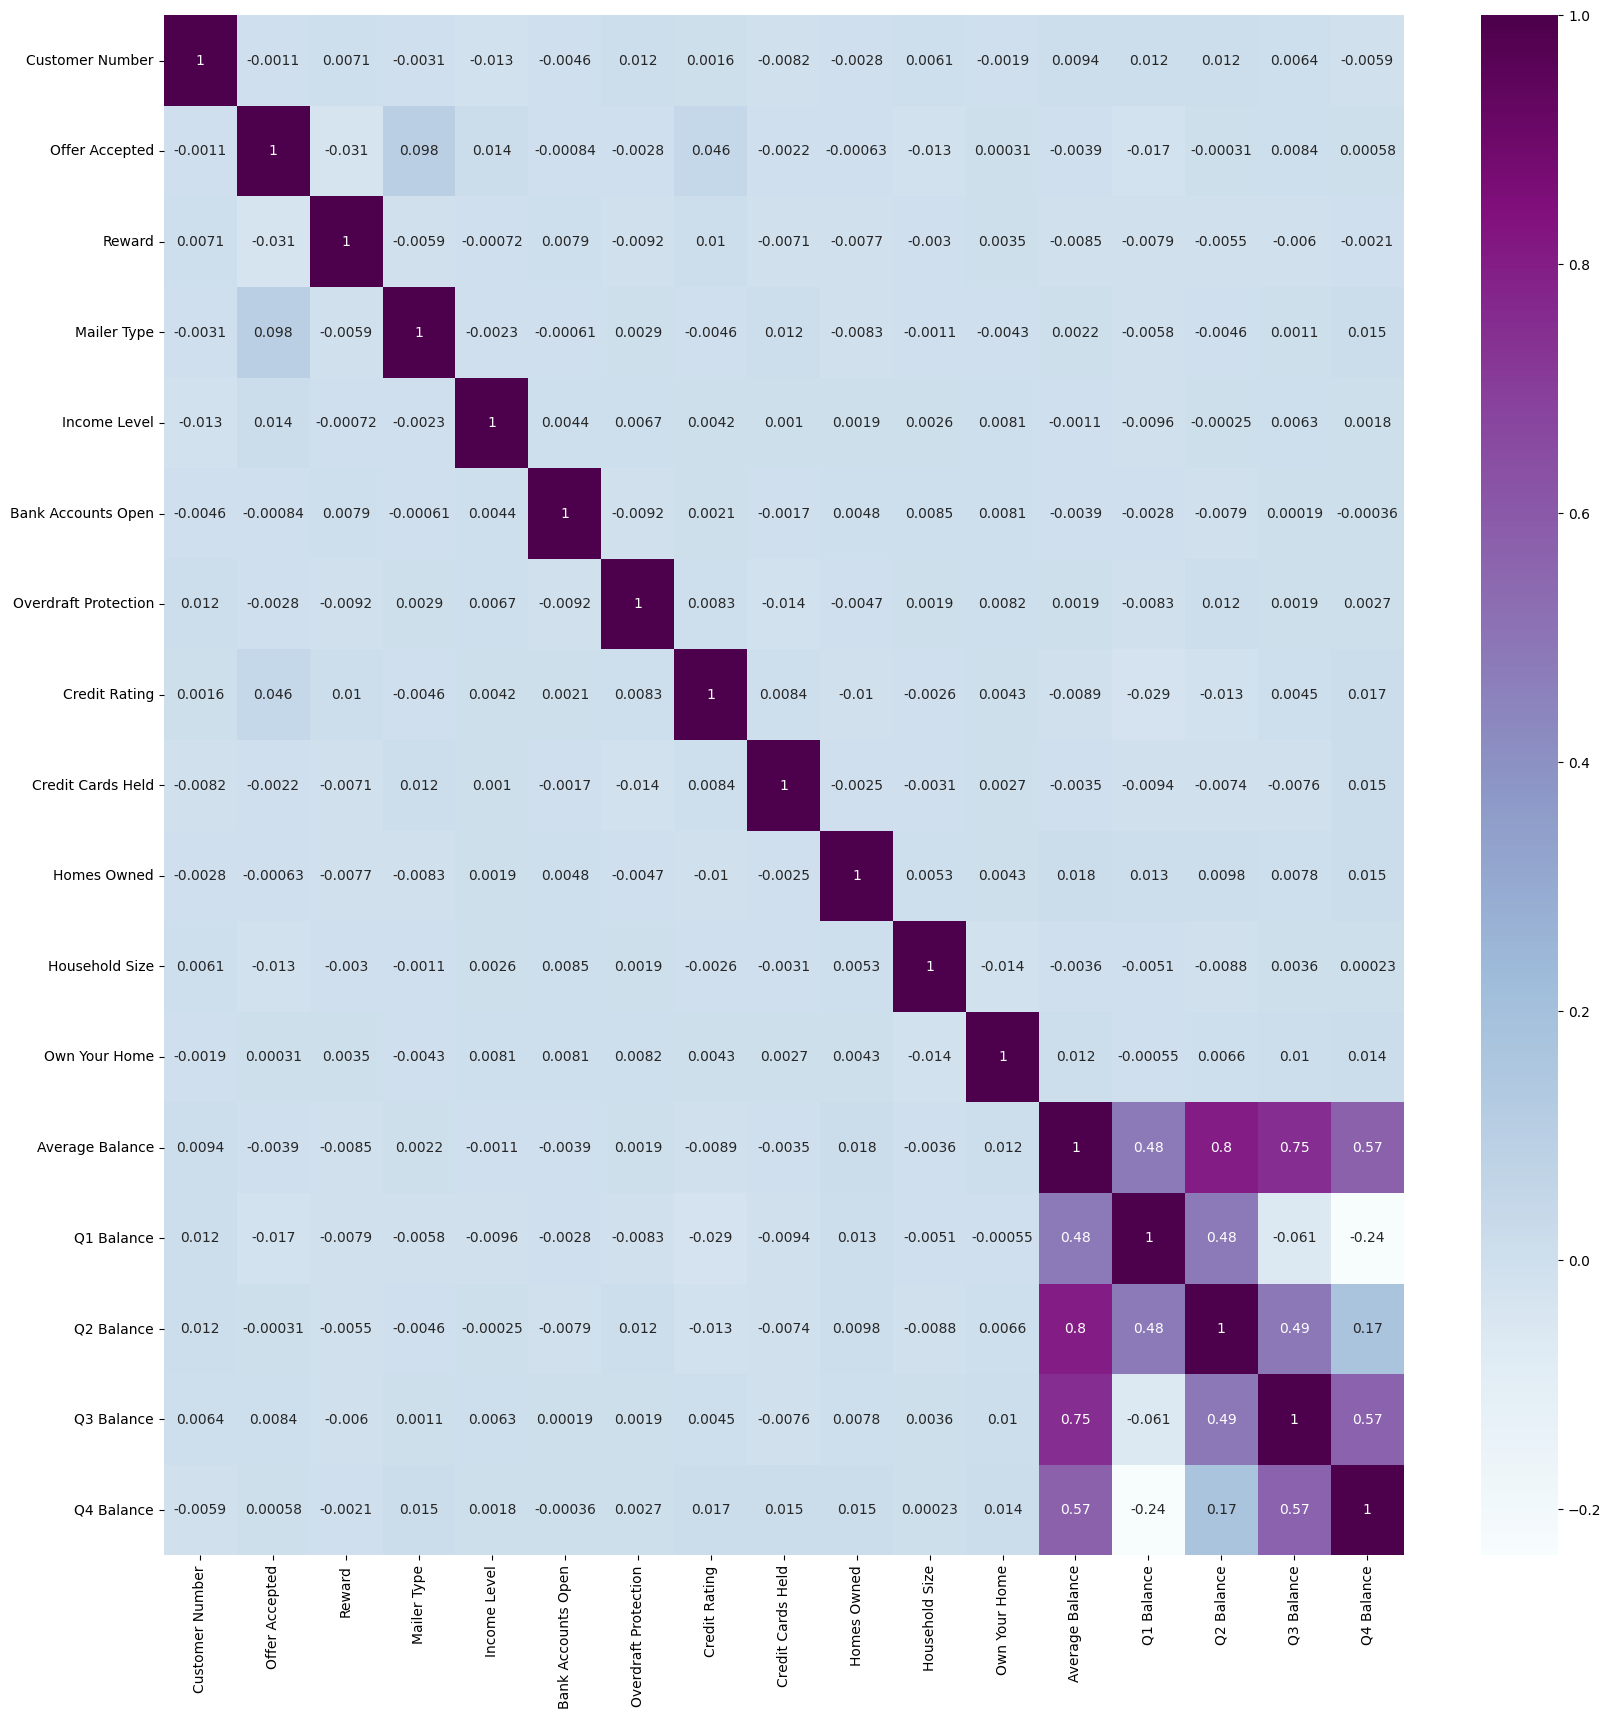

In [ ]:
corr = data.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr, annot=True, cmap='BuPu')

Hapus kolom costumer number karena tidak memiliki pengaruh untuk modeling

In [ ]:
X = data.drop(columns=['Offer Accepted', 'Customer Number'], axis=1)
y = data['Offer Accepted']

In [ ]:
# Lakukan normalisasi pada data menggunakan standarscaler
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_scaler = sc.fit_transform(X)

In [ ]:
# train test split
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, f1_score
x_train, x_test, y_train, y_test = train_test_split(x_scaler, y, test_size=0.25, random_state=42, stratify=y)

In [ ]:
# hint - use combination of over sampling and under sampling
# balance the class with equal distribution
from imblearn.over_sampling import SMOTE
over_sample = SMOTE()
x_smote, y_smote = over_sample.fit_resample(x_train, y_train)

In [ ]:
y_smote.value_counts()

1    12733
0    12733
Name: Offer Accepted, dtype: int64

In [ ]:
# classify function
from sklearn.model_selection import cross_val_score
def classify(model, x, y):
    x_train, x_test, y_train, y_test = train_test_split(x_smote, y_smote, test_size=0.25, random_state=42)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print("Accuracy is", model.score(x_test, y_test)*100)
    print(classification_report(y_test, y_pred))
    # cross validation - it is used for better validation of model
    # eg: cv-5, train-4, test-1
    score = cross_val_score(model, x, y, cv=5)
    print("Cross validation is",np.mean(score)*100)

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
classify(model, X, y)

Accuracy is 64.09612062195697
              precision    recall  f1-score   support

           0       0.66      0.60      0.63      3207
           1       0.63      0.69      0.65      3160

    accuracy                           0.64      6367
   macro avg       0.64      0.64      0.64      6367
weighted avg       0.64      0.64      0.64      6367

Cross validation is 94.31666666666668


In [ ]:
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
model = RandomForestClassifier()
classify(model, X, y)

Accuracy is 97.56557248311607
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      3207
           1       0.98      0.97      0.98      3160

    accuracy                           0.98      6367
   macro avg       0.98      0.98      0.98      6367
weighted avg       0.98      0.98      0.98      6367

Cross validation is 94.32222222222222


In [ ]:
model = ExtraTreesClassifier()
classify(model, X, y)

Accuracy is 98.94769907334694
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3207
           1       0.99      0.99      0.99      3160

    accuracy                           0.99      6367
   macro avg       0.99      0.99      0.99      6367
weighted avg       0.99      0.99      0.99      6367

Cross validation is 94.21111111111111
